## **Setups**

### Import Necessary Libraries

In [1]:
from ultralytics import YOLO # Real-Time Object Detection Model
import cv2 # OpenCV for Computer Vision
import matplotlib.pyplot as plt
import os # For system manipulation purposes

### Define paths to the dataset

In [4]:
dataset = "new_dataset/data.yaml"

### Load a COCO-pretrained YOLO11n model

In [3]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 381MB/s]


## **Train**

In [8]:
results = model.train(

    data=dataset,           # Path to dataset config (data.yaml)
    device=0,               # Use GPU (0 = first GPU)

    imgsz=416,              # Input image size (416x416)
    batch=32,               # Number of images being processed at once
    epochs=50,              # Number of training epochs
    patience=10,            # Stop if no improvement after 10 epochs (Early Stopping)

    cache=True,             # Cache images for faster training

    lr0=0.01,               # Initial learning rate
    lrf=0.001,              # Final learning rate factor

    optimizer="SGD",        # Optimizer: Stochastic Gradient Descent (Great for YOLO)

)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=416, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 4158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4158/4158 [00:02<00:00, 1547.23it/s]


train: New cache created: /content/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 4161. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.5GB RAM): 100%|██████████| 4158/4158 [00:04<00:00, 1009.83it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/dataset/valid/labels... 396 images, 0 backgrounds, 0 corrupt: 100%|██████████| 396/396 [00:00<00:00, 1155.80it/s]

val: New cache created: /content/dataset/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 396. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 396/396 [00:00<00:00, 456.73it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.04G      1.002      2.144      1.265         84        416: 100%|██████████| 130/130 [00:40<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]


                   all        396        396      0.323      0.538      0.362       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.96G     0.9317      1.222      1.188         78        416: 100%|██████████| 130/130 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        396        396       0.29      0.267      0.224     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.97G     0.9526      1.067      1.199         72        416: 100%|██████████| 130/130 [00:38<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]

                   all        396        396      0.331      0.694      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.98G       1.03      1.102      1.232         86        416: 100%|██████████| 130/130 [00:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        396        396      0.262      0.367      0.209     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.97G     0.9777     0.9812      1.205         77        416: 100%|██████████| 130/130 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]


                   all        396        396      0.557       0.71      0.689      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.97G     0.9443     0.8999      1.185         81        416: 100%|██████████| 130/130 [00:40<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        396        396      0.538      0.673      0.616      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.97G     0.9024     0.8509      1.167         73        416: 100%|██████████| 130/130 [00:39<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]

                   all        396        396      0.506      0.606      0.572      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.97G     0.8677     0.7946      1.147         78        416: 100%|██████████| 130/130 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]

                   all        396        396      0.556      0.715      0.676      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.97G      0.832     0.7521       1.13         77        416: 100%|██████████| 130/130 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]


                   all        396        396      0.415      0.623      0.538      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.97G     0.8016     0.7179      1.116         68        416: 100%|██████████| 130/130 [00:38<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]

                   all        396        396      0.538      0.741      0.703      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.97G     0.7828     0.6863      1.108         82        416: 100%|██████████| 130/130 [00:38<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.26it/s]

                   all        396        396      0.601      0.762      0.781      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.97G     0.7587     0.6595      1.094         84        416: 100%|██████████| 130/130 [00:38<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]

                   all        396        396        0.6      0.761      0.728      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.97G     0.7426     0.6337      1.091         83        416: 100%|██████████| 130/130 [00:38<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


                   all        396        396      0.594      0.699      0.684      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.97G      0.716     0.6157       1.07         81        416: 100%|██████████| 130/130 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        396        396      0.667      0.807      0.822      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.97G     0.7016     0.5913      1.069         78        416: 100%|██████████| 130/130 [00:38<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]

                   all        396        396      0.676      0.787      0.804      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.97G     0.6768     0.5698      1.055         79        416: 100%|██████████| 130/130 [00:38<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]

                   all        396        396      0.688      0.791      0.831      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.97G     0.6774     0.5664      1.052         69        416: 100%|██████████| 130/130 [00:38<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        396        396      0.695      0.745      0.805      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.97G     0.6546     0.5423      1.047         73        416: 100%|██████████| 130/130 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        396        396      0.685      0.821      0.835      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.97G     0.6441     0.5342      1.046         71        416: 100%|██████████| 130/130 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]

                   all        396        396      0.772      0.783      0.857      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.97G     0.6355     0.5227      1.035         75        416: 100%|██████████| 130/130 [00:39<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]

                   all        396        396       0.67      0.801      0.845      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.97G      0.621     0.5101      1.028         67        416: 100%|██████████| 130/130 [00:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]

                   all        396        396      0.763      0.856      0.895       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.97G     0.6096     0.4907      1.032         92        416: 100%|██████████| 130/130 [00:40<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]


                   all        396        396      0.694      0.819      0.854      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.97G     0.5988     0.4908      1.024         80        416: 100%|██████████| 130/130 [00:38<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]

                   all        396        396      0.669      0.825      0.843      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.97G     0.5869     0.4787      1.019         90        416: 100%|██████████| 130/130 [00:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]

                   all        396        396      0.792      0.759      0.869       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.97G     0.5786     0.4695      1.014         85        416: 100%|██████████| 130/130 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        396        396      0.754      0.873      0.891      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.97G     0.5681     0.4548      1.014         79        416: 100%|██████████| 130/130 [00:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        396        396      0.745      0.823      0.887      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.97G     0.5637     0.4497      1.008         95        416: 100%|██████████| 130/130 [00:38<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]

                   all        396        396      0.768      0.787      0.871      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.97G     0.5481     0.4314      1.009         83        416: 100%|██████████| 130/130 [00:38<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]

                   all        396        396      0.708      0.837      0.857      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.97G     0.5406     0.4311      1.006         79        416: 100%|██████████| 130/130 [00:38<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        396        396      0.791      0.847      0.888      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.97G     0.5319     0.4186     0.9997         90        416: 100%|██████████| 130/130 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        396        396      0.796      0.808      0.893      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.97G     0.5241     0.4129     0.9921         87        416: 100%|██████████| 130/130 [00:38<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]

                   all        396        396      0.793      0.815      0.884      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.97G     0.5164     0.4059     0.9931         77        416: 100%|██████████| 130/130 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]

                   all        396        396      0.825      0.844      0.916      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.97G     0.5103      0.394     0.9902         80        416: 100%|██████████| 130/130 [00:39<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        396        396      0.836      0.832      0.908       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.97G     0.4961     0.3914     0.9872         80        416: 100%|██████████| 130/130 [00:39<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        396        396      0.835      0.851      0.905      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.97G     0.4923     0.3812     0.9857         88        416: 100%|██████████| 130/130 [00:39<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]

                   all        396        396      0.817       0.86      0.914      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.97G     0.4874     0.3817     0.9815         85        416: 100%|██████████| 130/130 [00:39<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]

                   all        396        396      0.832      0.867      0.919      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.97G     0.4753     0.3713     0.9771         71        416: 100%|██████████| 130/130 [00:39<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        396        396       0.83       0.88      0.923      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.97G     0.4668     0.3589     0.9771         76        416: 100%|██████████| 130/130 [00:40<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]

                   all        396        396      0.771      0.858      0.909      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.97G     0.4616     0.3597     0.9758         71        416: 100%|██████████| 130/130 [00:38<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]

                   all        396        396       0.86      0.876      0.932      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.97G     0.4536     0.3564     0.9681         77        416: 100%|██████████| 130/130 [00:38<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]

                   all        396        396      0.855      0.887      0.928       0.67


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.98G      0.791     0.6254      1.211         30        416: 100%|██████████| 130/130 [00:39<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        396        396      0.814      0.824      0.895      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.97G     0.7538     0.4634      1.169         30        416: 100%|██████████| 130/130 [00:37<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        396        396      0.875      0.844      0.927      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.97G     0.7411     0.4394      1.166         30        416: 100%|██████████| 130/130 [00:37<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]

                   all        396        396      0.876      0.864      0.936      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.97G     0.7337     0.4066      1.153         30        416: 100%|██████████| 130/130 [00:36<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]

                   all        396        396      0.855      0.889      0.938      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.98G     0.7124     0.3895      1.148         30        416: 100%|██████████| 130/130 [00:37<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.50it/s]

                   all        396        396      0.826      0.887      0.934       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.98G     0.6912     0.3668       1.13         30        416: 100%|██████████| 130/130 [00:37<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]

                   all        396        396       0.88       0.89      0.944      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.98G     0.6775     0.3505       1.12         30        416: 100%|██████████| 130/130 [00:36<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]

                   all        396        396       0.88      0.874      0.933       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.98G     0.6667     0.3391      1.114         30        416: 100%|██████████| 130/130 [00:37<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        396        396      0.881      0.882      0.951      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.98G     0.6543     0.3231       1.11         30        416: 100%|██████████| 130/130 [00:37<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        396        396      0.911      0.877      0.948      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.97G      0.645      0.316      1.101         30        416: 100%|██████████| 130/130 [00:36<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        396        396      0.918      0.881      0.956      0.706



50 epochs completed in 0.579 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.4MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]


                   all        396        396      0.918      0.881      0.956      0.706
                 glass        102        102      0.905      0.842      0.933      0.603
                 metal         89         89      0.925      0.831      0.965      0.654
                 paper        122        122      0.928      0.959      0.991      0.792
               plastic         83         83      0.913       0.89      0.937      0.776
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train3


## **Validate**

In [5]:
model = YOLO("new_runs/detect/train3/weights/best.pt", task='detect')
results = model.val(data=dataset, device=0, imgsz=416)

Ultralytics 8.3.51  Python-3.12.4 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\ahmed\OneDrive\Desktop\Autonomous-Waste-Collecting-and-Sorting-Robot\new_dataset\valid\labels... 396 images, 0 backgrounds, 0 corrupt: 100%|██████████| 396/396 [00:00<00:00, 933.16it/s]

val: New cache created: C:\Users\ahmed\OneDrive\Desktop\Autonomous-Waste-Collecting-and-Sorting-Robot\new_dataset\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 396. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.35it/s]


                   all        396        396      0.918      0.881      0.956      0.706
                 glass        102        102      0.905      0.843      0.933      0.603
                 metal         89         89      0.925      0.832      0.964      0.654
                 paper        122        122       0.93      0.959      0.991      0.794
               plastic         83         83      0.912      0.892      0.937      0.775
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs\detect\val2


## **Test**

### Test On Multiple Images Functions

In [8]:
def test_on_images(folder_path: str, imgsz: int = 640, conf: float = 0.5) -> None:
    # Loop through all image files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            # Construct the full image path
            image_path = os.path.join(folder_path, filename)

            # Load the image
            frame = cv2.imread(image_path)

            # Perform inference using YOLO model with confidence threshold set to 0.25
            results = model.predict(frame, imgsz=imgsz, conf=conf)

            # Annotate the frame with YOLO results
            annotated_frame = results[0].plot()

            # Display the annotated frame
            plt.imshow(annotated_frame)
            plt.title(filename)
            plt.axis('off')
            plt.show()

### On Taken Photos in Galala Uni


0: 416x320 1 Plastic, 113.7ms
Speed: 12.3ms preprocess, 113.7ms inference, 261.4ms postprocess per image at shape (1, 3, 416, 320)


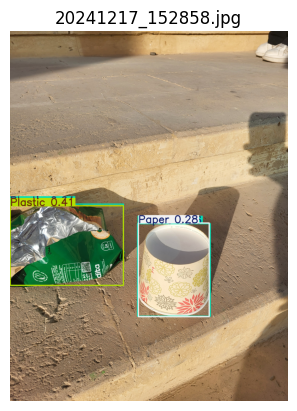


0: 320x416 (no detections), 129.5ms
Speed: 4.0ms preprocess, 129.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)


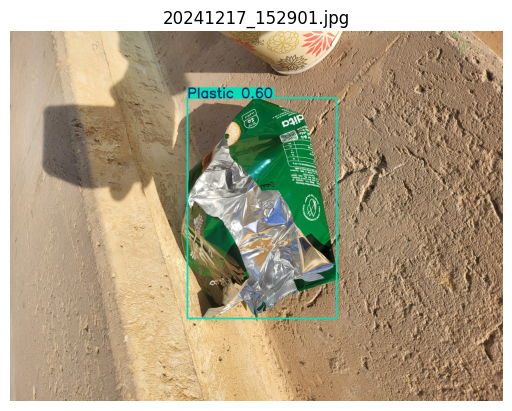


0: 416x320 2 Plastics, 53.8ms
Speed: 4.0ms preprocess, 53.8ms inference, 14.0ms postprocess per image at shape (1, 3, 416, 320)


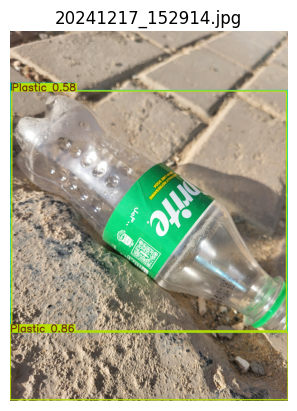


0: 416x320 (no detections), 96.6ms
Speed: 5.0ms preprocess, 96.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


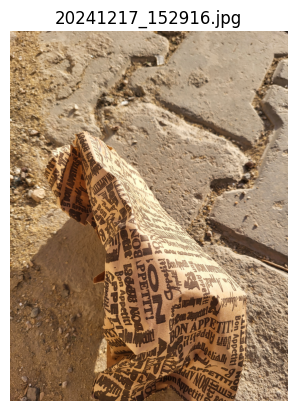


0: 416x320 1 Plastic, 105.5ms
Speed: 4.0ms preprocess, 105.5ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 320)


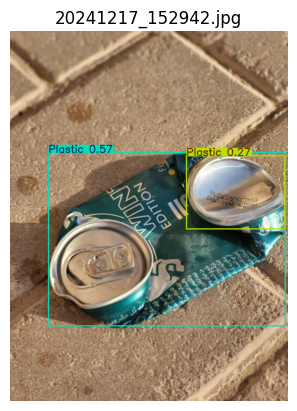


0: 416x320 (no detections), 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


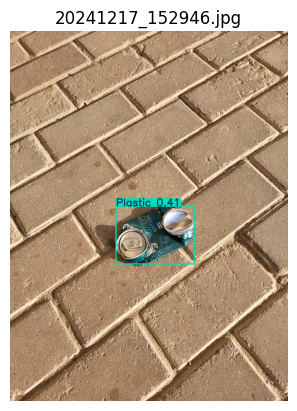


0: 416x320 1 Plastic, 29.4ms
Speed: 3.0ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 320)


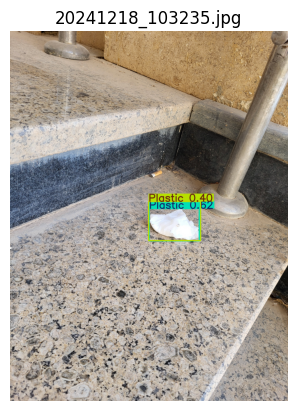


0: 416x320 (no detections), 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


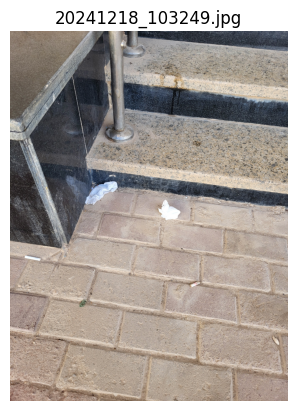


0: 416x320 1 Plastic, 45.2ms
Speed: 3.0ms preprocess, 45.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


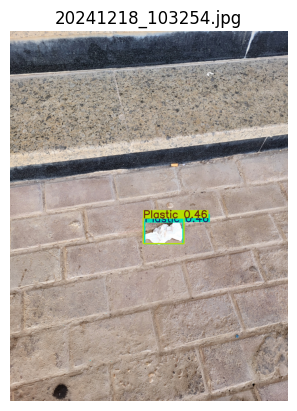


0: 416x320 1 Plastic, 51.0ms
Speed: 2.0ms preprocess, 51.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 320)


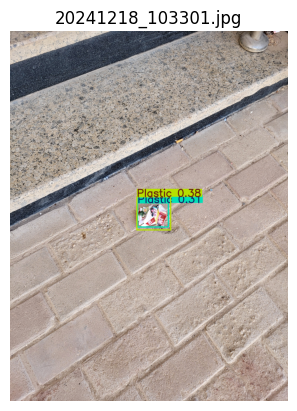


0: 416x320 (no detections), 82.8ms
Speed: 2.6ms preprocess, 82.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 320)


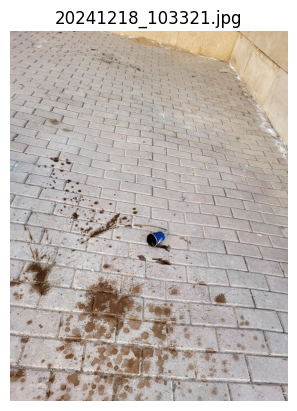


0: 416x320 (no detections), 40.0ms
Speed: 3.0ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


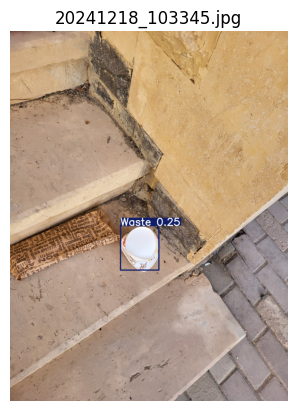


0: 416x320 1 Paper, 134.8ms
Speed: 3.0ms preprocess, 134.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


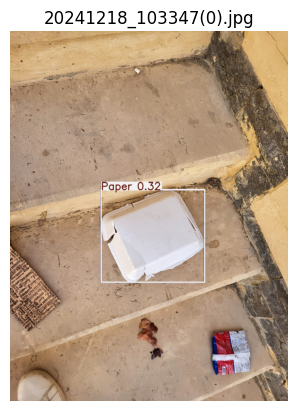


0: 416x320 (no detections), 110.8ms
Speed: 3.0ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


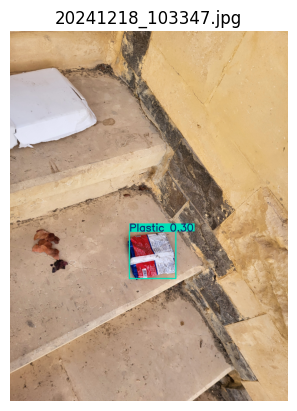


0: 416x320 1 Plastic, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 6.6ms postprocess per image at shape (1, 3, 416, 320)


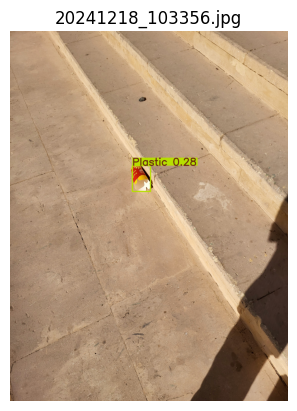

In [ ]:
test_on_images("custom_test/galala_test")

### On Taken Photos with ESP Camera


0: 320x416 (no detections), 217.9ms
Speed: 84.6ms preprocess, 217.9ms inference, 10.0ms postprocess per image at shape (1, 3, 320, 416)


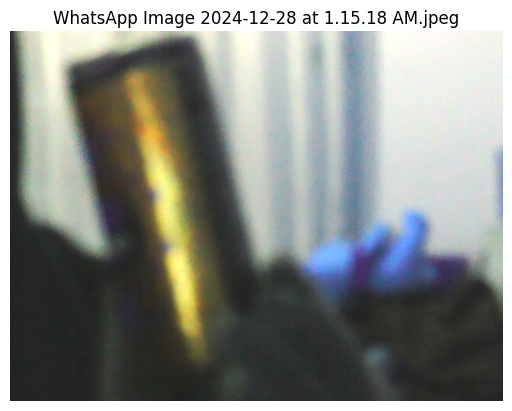


0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)


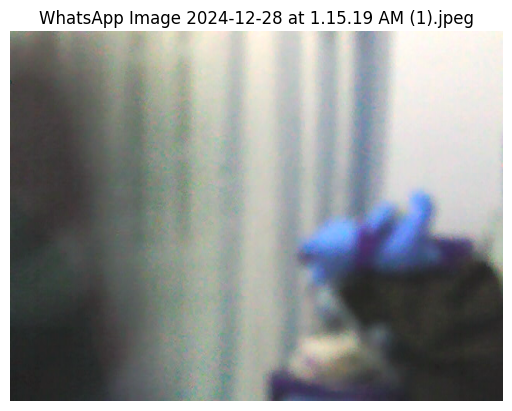


0: 320x416 (no detections), 19.0ms
Speed: 1.0ms preprocess, 19.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)


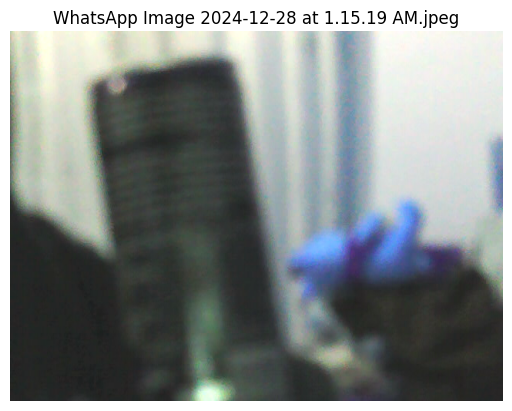


0: 320x416 1 Glass, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 10.0ms postprocess per image at shape (1, 3, 320, 416)


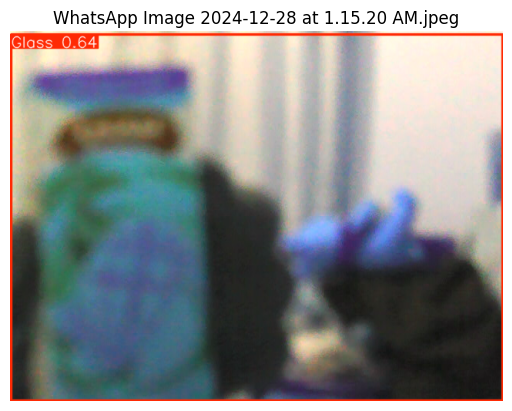


0: 320x416 1 Glass, 21.6ms
Speed: 3.0ms preprocess, 21.6ms inference, 5.0ms postprocess per image at shape (1, 3, 320, 416)


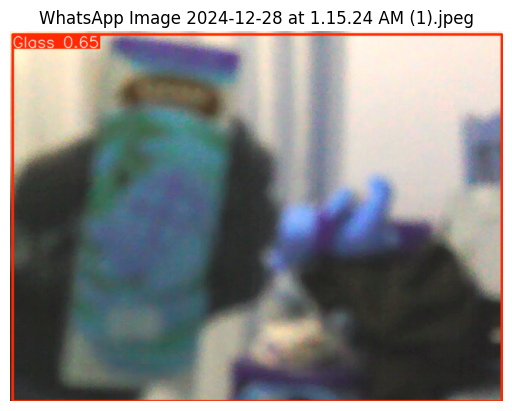


0: 320x416 1 Glass, 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)


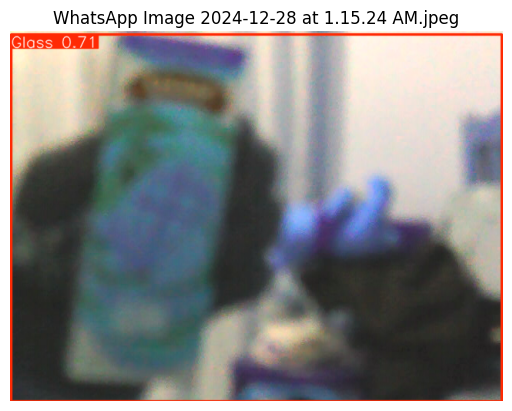


0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)


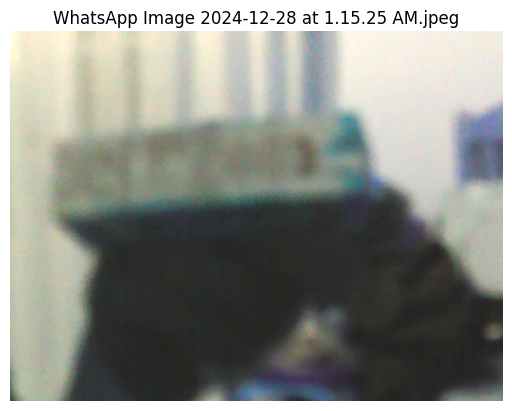


0: 320x416 1 Glass, 1 Metal, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)


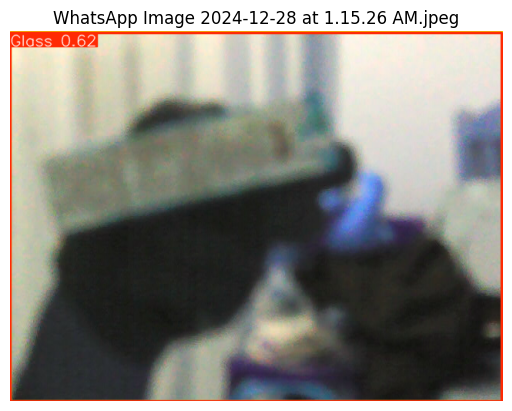


0: 320x416 1 Glass, 35.8ms
Speed: 3.1ms preprocess, 35.8ms inference, 5.0ms postprocess per image at shape (1, 3, 320, 416)


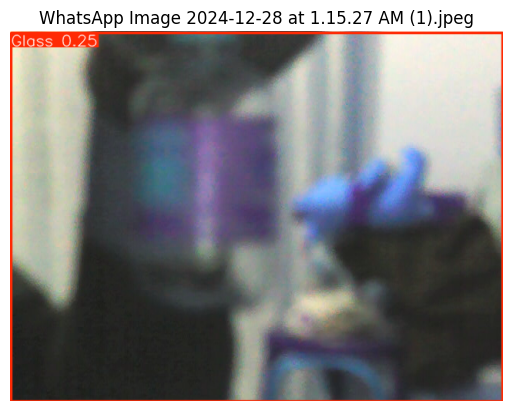


0: 320x416 1 Glass, 27.8ms
Speed: 1.0ms preprocess, 27.8ms inference, 7.1ms postprocess per image at shape (1, 3, 320, 416)


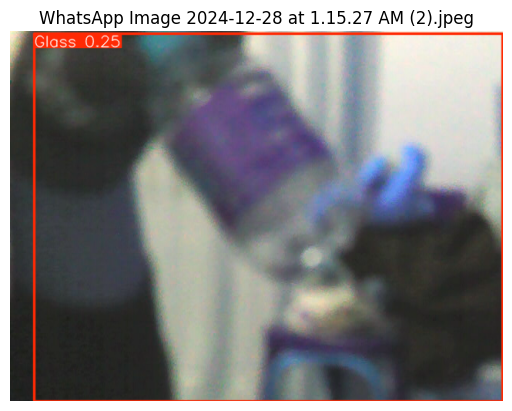


0: 320x416 (no detections), 28.6ms
Speed: 2.0ms preprocess, 28.6ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)


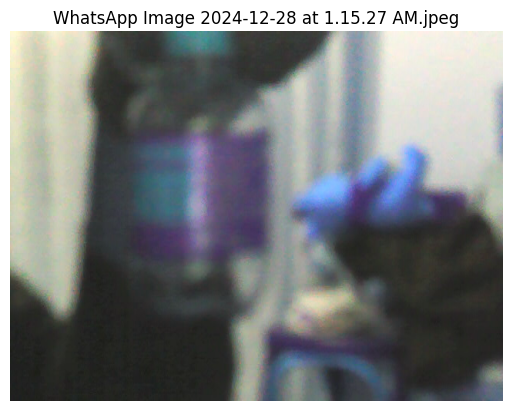


0: 320x416 1 Glass, 30.0ms
Speed: 3.0ms preprocess, 30.0ms inference, 5.3ms postprocess per image at shape (1, 3, 320, 416)


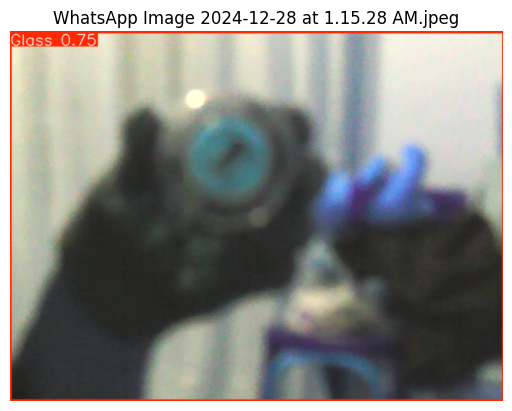


0: 320x416 1 Glass, 30.0ms
Speed: 2.0ms preprocess, 30.0ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 416)


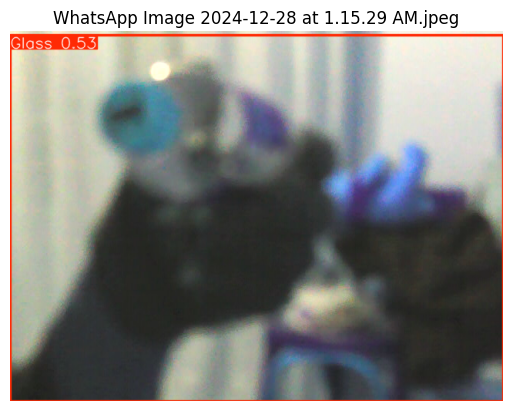

In [ ]:
test_on_images("custom_test/esp_cam")

## **Run**

### On Webcam

In [ ]:
# Open the default camera
cam = cv2.VideoCapture(0)
if not cam.isOpened():
    print("Error: Camera not accessible.")
    exit()

while True:
    ret, frame = cam.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Perform inference using YOLO model with confidence threshold set to 0.5
    results = model.predict(frame, conf=0.5, iou=0.7)

    # Annotate the frame with YOLO results
    annotated_frame = results[0].plot()

    # Display the processed frame
    cv2.imshow("Webcam", annotated_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        print("Exiting...")
        break

# Release the capture and close windows
cam.release()
cv2.destroyAllWindows()

## **Deployment**

### Export the Model

In [ ]:
# Export the model to NCNN format
model.export(format="ncnn", device=0)  # creates 'yolo11n_ncnn_model'